In [1]:
# Data and plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold

# Models
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model

# Metrics
from sklearn import metrics

# import my functions
from help_functions import *
from churn_modelling import *

# Data ingestion

Ingest data from the ```.csv``` and ```.xlsx``` files and storage (temporarily) as a ```Pandas``` object.

+ **data_train:** data labeled for train model.
+ **data_test:** data without label for predict the customer churn.

In [2]:
data_test = pd.read_excel('.data\Test sample No Label.xlsx')
data_train = pd.read_csv('.data\Train Set.csv')

# EDA

In this section we're an Exploratory Data Analysis

In [3]:
print("Dataset with {:,.0f} observations and {:,.0f} variables.".format(data_train.shape[0], data_train.shape[1]-1))
data_train.head()

Dataset with 6,143 observations and 20 variables.


customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     A00001   Male              0     Yes        Yes      66          Yes   
1     A00002   Male              0      No         No      29          Yes   
2     A00003   Male              0      No         No       9          Yes   
3     A00004   Male              1     Yes        Yes      26          Yes   
4     A00005   Male              0     Yes        Yes      55          Yes   

  MultipleLines InternetService       OnlineSecurity  ...  \
0           Yes             DSL                   No  ...   
1            No              No  No internet service  ...   
2            No     Fiber optic                   No  ...   
3           Yes     Fiber optic                   No  ...   
4            No              No  No internet service  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0                  Yes                   No                  Yes   
1  No internet service  No internet service  No internet service   
2                   No                   No                   No   
3                  Yes                   No                  Yes   
4  No internet service  No internet service  No internet service   

       StreamingMovies        Contract PaperlessBilling  \
0                  Yes        Two year               No   
1  No internet service        One year              Yes   
2                   No  Month-to-month              Yes   
3                  Yes  Month-to-month               No   
4  No internet service        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Bank transfer (automatic)          79.85       5234.95    No  
1               Mailed check          19.80         572.2    No  
2           Electronic check          70.50         597.9    No  
3           Electronic check         105.75       2710.25   Yes  
4               Mailed check          19.50       1026.35    No  

[5 rows x 21 columns]

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6143 entries, 0 to 6142
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6143 non-null   object 
 1   gender            6143 non-null   object 
 2   SeniorCitizen     6143 non-null   int64  
 3   Partner           6143 non-null   object 
 4   Dependents        6143 non-null   object 
 5   tenure            6143 non-null   int64  
 6   PhoneService      6143 non-null   object 
 7   MultipleLines     6143 non-null   object 
 8   InternetService   6143 non-null   object 
 9   OnlineSecurity    6143 non-null   object 
 10  OnlineBackup      6143 non-null   object 
 11  DeviceProtection  6143 non-null   object 
 12  TechSupport       6143 non-null   object 
 13  StreamingTV       6143 non-null   object 
 14  StreamingMovies   6143 non-null   object 
 15  Contract          6143 non-null   object 
 16  PaperlessBilling  6143 non-null   object 


We've see that the first column, *customerID*, is not a variable. So, we've 19 variables in the dataset.

## Describe dataset

The 19 variables and the scope *Churn* are:

+ **customerID:** Customer ID
+ **gender:** Whether the customer is a male or a female
+ **SeniorCitizen:** 
Whether the customer is a senior citizen or not (1, 0)
+ **Partner:** 
Whether the customer has a partner or not (Yes, No)
+ **Dependents:** 
Whether the customer has dependents or not (Yes, No)
+ **tenure:** 
Number of months the customer has stayed with the company
+ **PhoneService:** 
Whether the customer has phone service or not (Yes, No)
+ **MultipleLines:** 
Whether the customer has multiple lines or not (Yes, No, No phone service)
+ **InternetService:**
Customer’s internet service provider (DSL, Fiber optic, No)
+ **OnlineSecurity:** 
Whether the customer has online security or not (Yes, No, No internet service)
+ **OnlineBackup:** 
Whether the customer has an online backup or not (Yes, No, No internet service)
+ **DeviceProtection:** 
Whether the customer has device protection or not (Yes, No, No internet service)
+ **TechSupport:** 
Whether the customer has tech support or not (Yes, No, No internet service)
+ **StreamingTV:** 
Whether the customer has streaming TV or not (Yes, No, No internet service)
+ **StreamingMovies:** 
Whether the customer has streaming movies or not (Yes, No, No internet service)
+ **Contract:** 
The contract term of the customer (Month-to-month, One year, Two year)
+ **PaperlessBilling:** 
Whether the customer has paperless billing or not (Yes, No)
+ **PaymentMethod:** 
The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
+ **MonthlyCharges:** 
The amount charged to the customer monthly in USD
+ **TotalCharges:** 
The total lifetime amount charged to the customer in USD
+ **Churn:** 
Whether the customer churned or not (Yes or No)

In [5]:
print("Total customers in the dataset: {:,.0f}".format(data_train.customerID.nunique()))

Total customers in the dataset: 6,143


There isn't customers with more than one observation in the dataset.

In [6]:
data_train.loc[data_train['tenure'] < 1]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
306      A00307  Female              0     Yes        Yes       0   
544      A00545  Female              0     Yes        Yes       0   
935      A00936    Male              0      No        Yes       0   
2161     A02162    Male              0     Yes        Yes       0   
3136     A03137  Female              0     Yes        Yes       0   
3366     A03367    Male              0     Yes        Yes       0   
3554     A03555    Male              0     Yes        Yes       0   
4556     A04557  Female              0     Yes        Yes       0   
4861     A04862    Male              0      No        Yes       0   
4970     A04971  Female              0     Yes        Yes       0   
5315     A05316    Male              0     Yes        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
306            No  No phone service             DSL                  Yes  ...   
544           Yes                No             DSL                  Yes  ...   
935           Yes               Yes             DSL                  Yes  ...   
2161          Yes                No              No  No internet service  ...   
3136           No  No phone service             DSL                  Yes  ...   
3366          Yes               Yes              No  No internet service  ...   
3554          Yes               Yes              No  No internet service  ...   
4556          Yes                No              No  No internet service  ...   
4861          Yes                No              No  No internet service  ...   
4970          Yes               Yes             DSL                   No  ...   
5315          Yes                No              No  No internet service  ...   

         DeviceProtection          TechSupport          StreamingTV  \
306                   Yes                  Yes                  Yes   
544                   Yes                   No                  Yes   
935                    No                  Yes                   No   
2161  No internet service  No internet service  No internet service   
3136                  Yes                  Yes                  Yes   
3366  No internet service  No internet service  No internet service   
3554  No internet service  No internet service  No internet service   
4556  No internet service  No internet service  No internet service   
4861  No internet service  No internet service  No internet service   
4970                  Yes                  Yes                  Yes   
5315  No internet service  No internet service  No internet service   

          StreamingMovies  Contract PaperlessBilling  \
306                    No  Two year               No   
544                   Yes  Two year               No   
935                    No  Two year              Yes   
2161  No internet service  Two year               No   
3136                   No  Two year              Yes   
3366  No internet service  Two year               No   
3554  No internet service  Two year               No   
4556  No internet service  Two year               No   
4861  No internet service  Two year               No   
4970                   No  Two year               No   
5315  No internet service  One year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
306     Credit card (automatic)          56.05                  No  
544                Mailed check          80.85                  No  
935   Bank transfer (automatic)          61.90                  No  
2161               Mailed check          19.85                  No  
3136  Bank transfer (automatic)          52.55                  No  
3366               Mailed check          25.75                  No  
3554               Mailed check          25.35                  No  
4556               Mailed check          20.00                  No  
4861               Mailed check          20.25          

The next steps:

+ Drop observations of new users, ```tenure=0```.

+ Convert *TotalCharges* to ```float```.

In [7]:
data_train = data_train.loc[data_train['tenure']>0].copy()
data_train['TotalCharges'] = data_train['TotalCharges'].astype('float')
data_train.sample(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
2047     A02048  Female              0     Yes         No       3   
99       A00100  Female              0      No         No      19   
6092     A06093    Male              0     Yes        Yes      25   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
2047          Yes               Yes     Fiber optic             No  ...   
99             No  No phone service             DSL             No  ...   
6092          Yes                No     Fiber optic             No  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
2047               No          No          No              No  Month-to-month   
99                 No          No         Yes             Yes        One year   
6092               No         Yes         Yes              No  Month-to-month   

     PaperlessBilling            PaymentMethod MonthlyCharges  TotalCharges  \
2047              Yes  Credit card (automatic)          75.15        216.75   
99                Yes  Credit card (automatic)          44.85        893.55   
6092               No         Electronic check          85.90       2199.05   

      Churn  
2047    Yes  
99      Yes  
6092     No  

[3 rows x 21 columns]

## Churn percent in the dataset

<AxesSubplot:ylabel='Churn'>

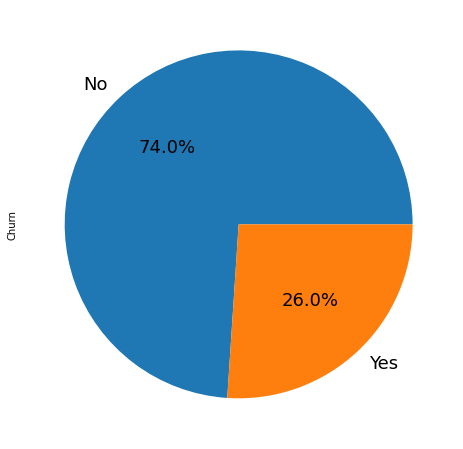

In [8]:
(data_train['Churn'].value_counts()*100.0 /len(data_train)).plot.pie(autopct='%.1f%%',figsize =(8,8), fontsize=18)

## Categorical variables

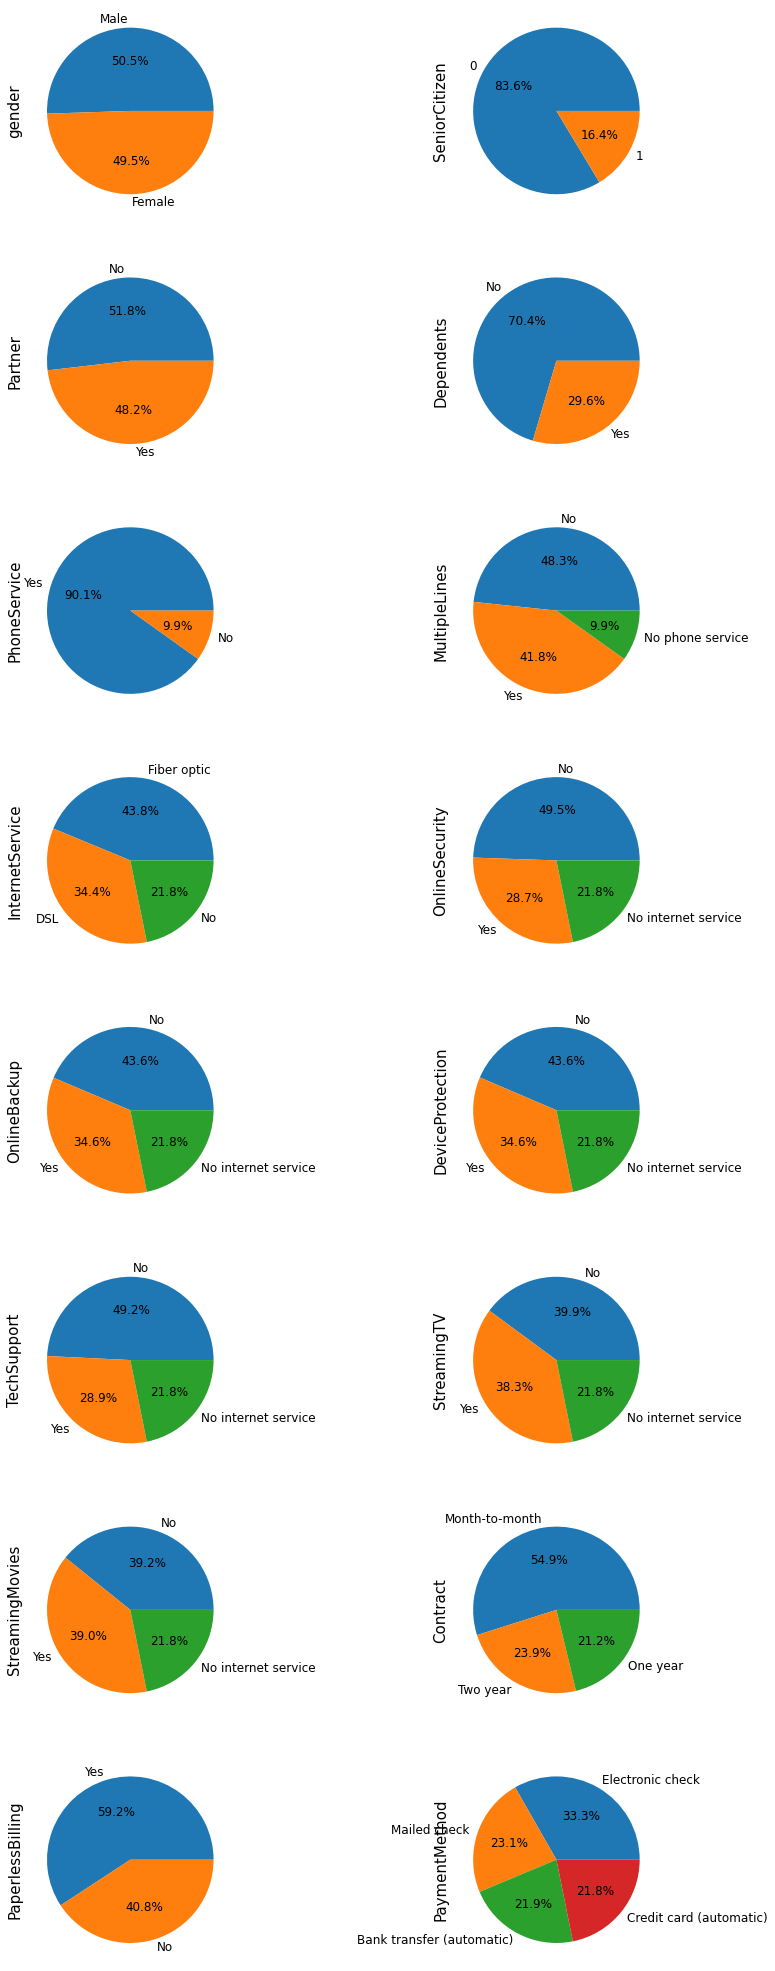

In [9]:
variables = np.delete(data_train.columns, [0, 5, 18, 19])
cat_eda(data_train, variables)

In [10]:
data_train.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    6132.000000  6132.000000     6132.000000   6132.000000
mean        0.163731    32.291422       64.630504   2272.941080
std         0.370062    24.441443       30.170374   2262.342901
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.150000    402.337500
50%         0.000000    29.000000       70.200000   1390.225000
75%         0.000000    55.000000       89.900000   3777.362500
max         1.000000    72.000000      118.650000   8684.800000

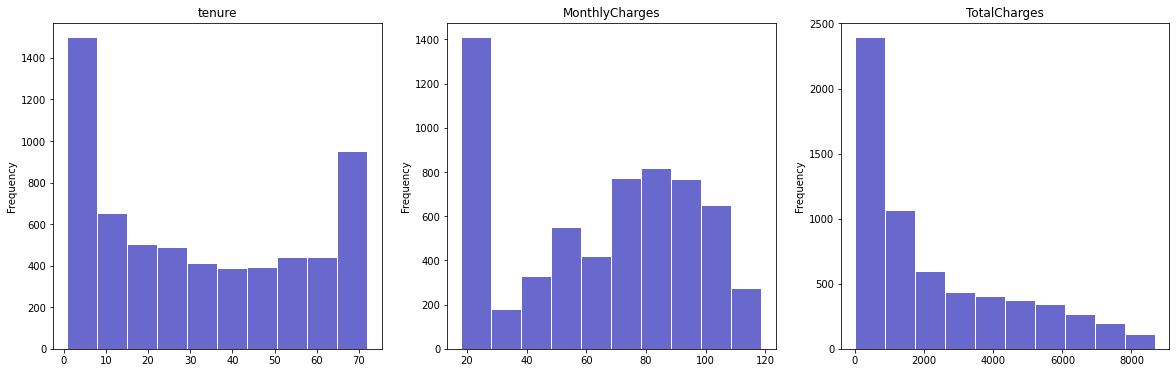

In [11]:
num_variables = np.array(['tenure', 'MonthlyCharges', 'TotalCharges'])
num_eda(data_train, num_variables)

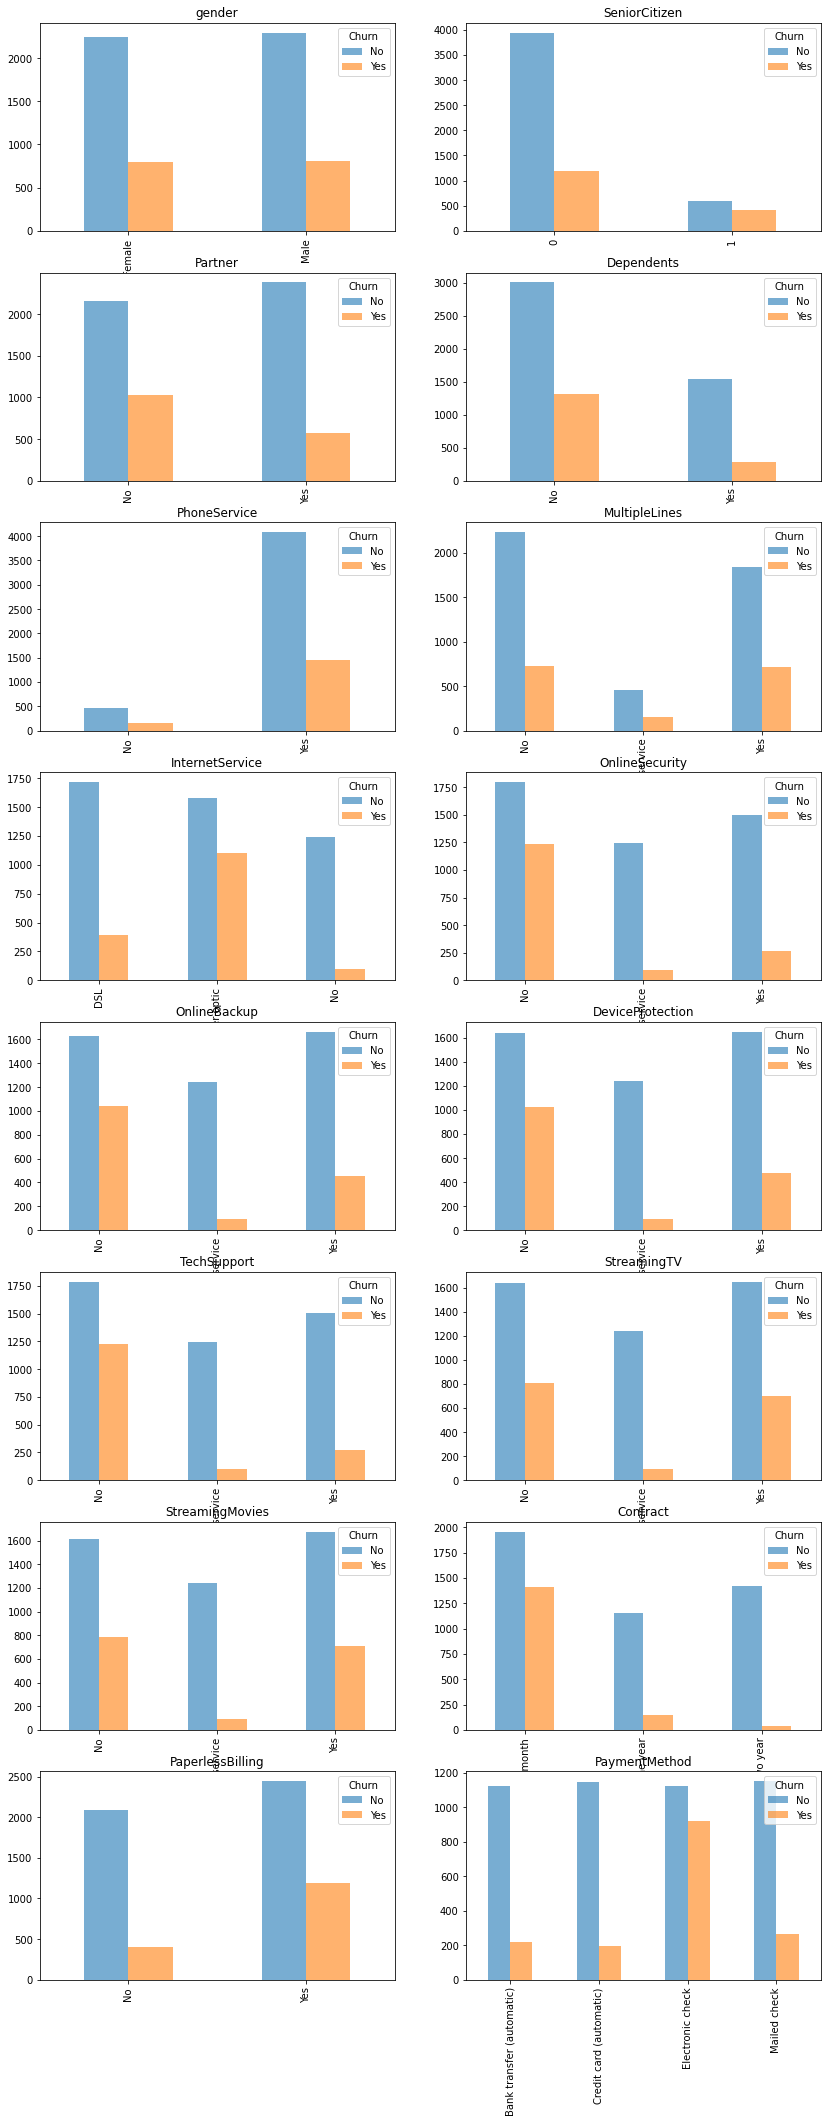

In [12]:
cat_targ(data_train, variables[:-1])

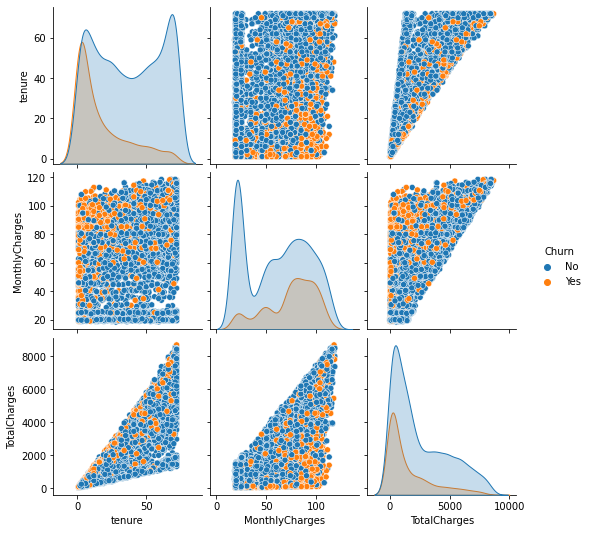

In [13]:
sns.pairplot(data_train, vars = num_variables, hue="Churn")

## Churn probability

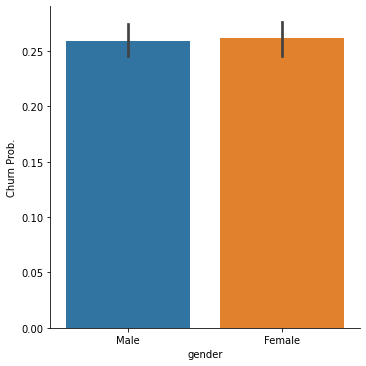

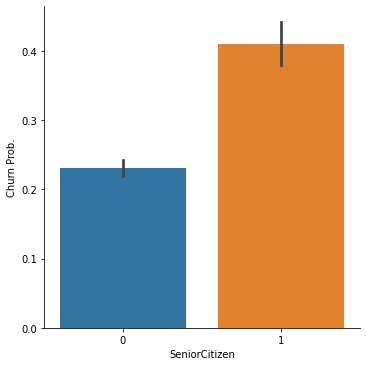

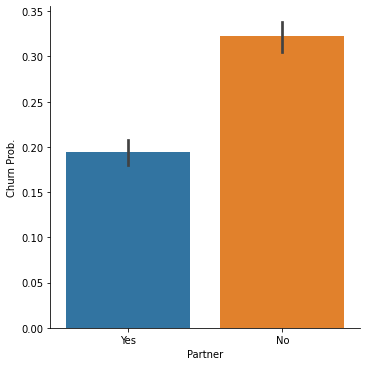

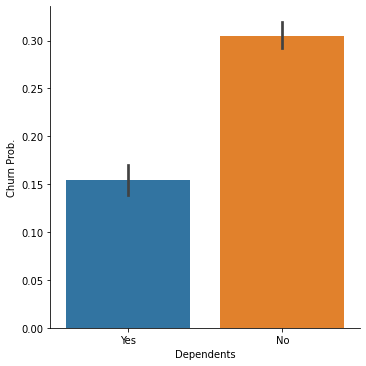

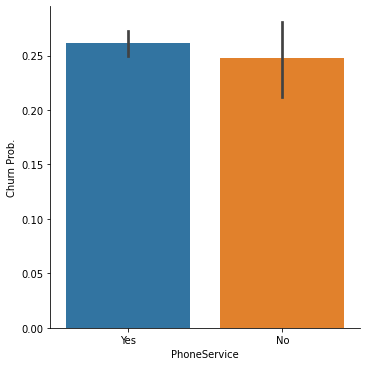

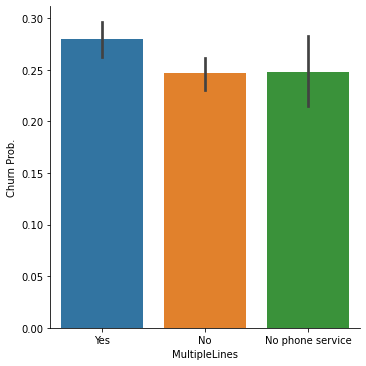

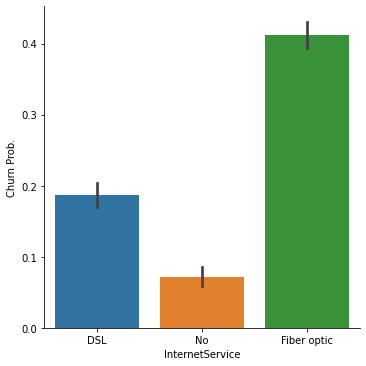

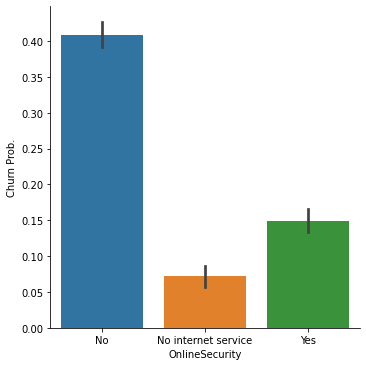

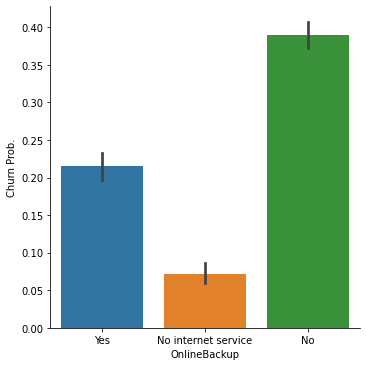

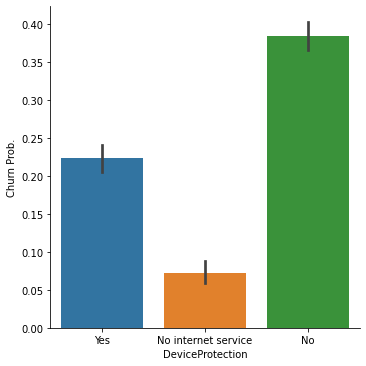

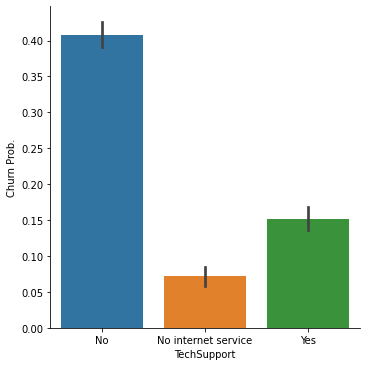

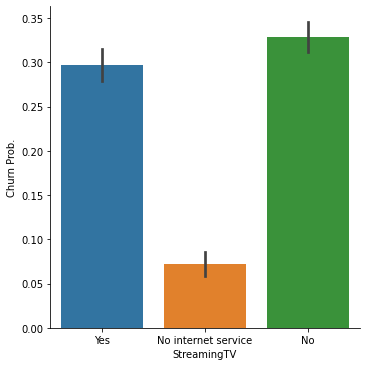

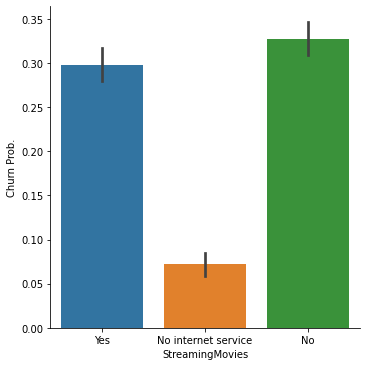

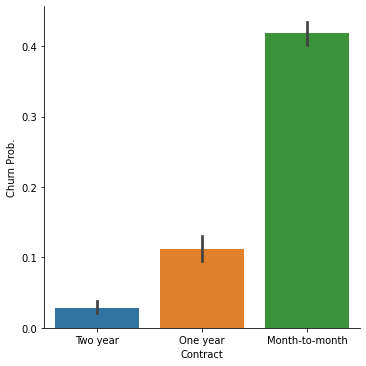

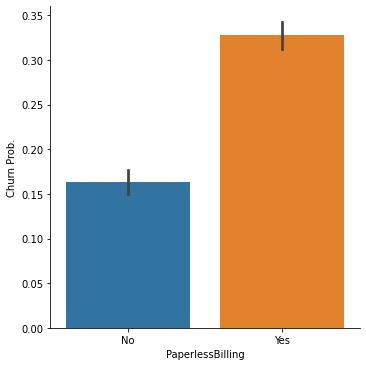

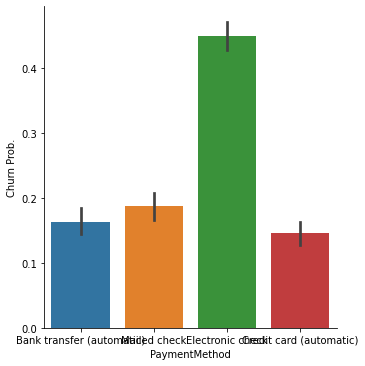

In [14]:
data_train['Churn'].replace({'Yes':1, 'No':0}, inplace=True)
for i in variables[:-1]:
    sns.catplot(x=i, y='Churn', kind='bar', data=data_train)
    plt.ylabel('Churn Prob.')

# Data Preprocessing

We'll transform the categorical variables as dummies.

In [15]:
df_model = modelling(df=data_train).var_dummies().sample(5)
df_model

tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  gender_Male  \
3235      13           96.85       1235.55      0              1            0   
2789      72          118.20       8547.15      0              0            1   
3484      33           95.00       3008.15      0              1            0   
2289       9           86.25        770.50      0              0            1   
4910      37           75.10       2658.80      0              1            0   

      SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  ...  \
3235                 0                  1           1            0  ...   
2789                 1                  0           1            0  ...   
3484                 1                  0           0            1  ...   
2289                 1                  0           1            0  ...   
4910                 1                  0           0            1  ...   

      StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
3235                    1                        1                  0   
2789                    1                        0                  0   
3484                    1                        1                  0   
2289                    0                        1                  0   
4910                    1                        0                  1   

      Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
3235                  0                    0                     1   
2789                  1                    0                     1   
3484                  0                    0                     1   
2289                  0                    1                     0   
4910                  0                    1                     0   

      PaymentMethod_Bank transfer (automatic)  \
3235                                        0   
2789                                        0   
3484                                        0   
2289                                        0   
4910                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
3235                                      0                               1   
2789                                      0                               1   
3484                                      1                               0   
2289                                      0                               1   
4910                                      0                               0   

      PaymentMethod_Mailed check  
3235                           0  
2789                           0  
3484                           0  
2289                           0  
4910                           0  

[5 rows x 47 columns]

## Transform scaler

Split in features ```X``` and target ```y``` and transform with a scaler.

In [16]:
X, y = modelling(df=data_train, preproc_scaler = preprocessing.MinMaxScaler).transform_data(feature_range=(0,1))

## Define models to test

In [17]:
class_models = {"Logistic Reg.":linear_model.LogisticRegression,
             "Grad. Boosting":ensemble.GradientBoostingClassifier,
             "Rand. Forest":ensemble.RandomForestClassifier,
             "SVM":svm.SVC,
             "KNeig":neighbors.KNeighborsClassifier}

### See the accuracy score per model

In [18]:
for name, model in class_models.items():
    acc_score = metrics.accuracy_score(y,
                                       modelling(df=data_train,
                                       classif=model,
                                       preproc_scaler=preprocessing.MinMaxScaler).strat_cross_val())
    print("{} : {:,.3f}".format(name, acc_score))

Logistic Reg. : 0.785
Grad. Boosting : 0.803
Rand. Forest : 0.794
SVM : 0.782
KNeig : 0.762


### Classification report per model

In [19]:
for name, model in class_models.items():
    class_report = metrics.classification_report(y,
                                                 modelling(df=data_train,
                                                 classif=model,
                                                 preproc_scaler=preprocessing.MinMaxScaler).strat_cross_val())
    print("{} \n {} \n".format(name, class_report))

Logistic Reg. 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      4535
           1       0.61      0.49      0.54      1597

    accuracy                           0.78      6132
   macro avg       0.72      0.69      0.70      6132
weighted avg       0.77      0.78      0.78      6132
 

Grad. Boosting 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      4535
           1       0.66      0.51      0.57      1597

    accuracy                           0.80      6132
   macro avg       0.75      0.71      0.72      6132
weighted avg       0.79      0.80      0.79      6132
 

Rand. Forest 
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      4535
           1       0.64      0.48      0.55      1597

    accuracy                           0.79      6132
   macro avg       0.73      0.69      0.71      6132
weighted avg       0.7

In [20]:
#for name, model in class_models.items():
#    conf_matrix = metrics.confusion_matrix(y, ml_models(X, y, model).strat_cross_val())
#    sns.heatmap(conf_matrix, annot=True,  fmt='');
#    plt.title(name);

In [21]:
gbc = class_models['Grad. Boosting']()
gbc.fit(X, y)

GradientBoostingClassifier()

## Variables relevance

<AxesSubplot:>

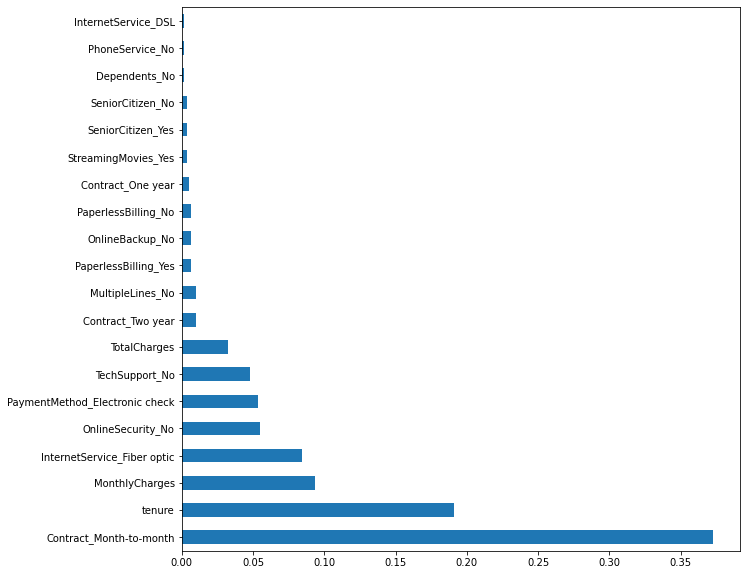

In [22]:
feature_importance = gbc.feature_importances_
#print (gbc.feature_importances_)
feat_importances = pd.Series(gbc.feature_importances_, index=df_model.drop(columns='Churn').columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

# Predict Churn for new users

In [23]:
my_sc = preprocessing.MinMaxScaler
X_pred = modelling(df=data_test, preproc_scaler=my_sc, target=False).transform_data()
y_hat = modelling(class_trained=gbc, target=False).predict_churn(X_pred)
df_pred = pd.concat([data_test, pd.DataFrame({'Churn': y_hat})], axis=1)
df_pred['Churn'].replace({1: 'Yes', 0: 'No'}, inplace=True)
df_pred.sample(8)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
483        8483    Male              0      No         No       4   
667        8667    Male              0      No        Yes      66   
307        8307    Male              1      No         No       2   
781        8781    Male              0     Yes        Yes      43   
256        8256    Male              0     Yes        Yes       5   
185        8185  Female              0      No         No      23   
165        8165    Male              0     Yes        Yes      55   
46         8046  Female              0     Yes        Yes      16   

    PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
483          Yes            No     Fiber optic                   No  ...   
667          Yes           Yes             DSL                  Yes  ...   
307          Yes           Yes     Fiber optic                   No  ...   
781          Yes           Yes     Fiber optic                  Yes  ...   
256          Yes            No              No  No internet service  ...   
185          Yes           Yes             DSL                  Yes  ...   
165          Yes            No              No  No internet service  ...   
46           Yes           Yes     Fiber optic                   No  ...   

        DeviceProtection          TechSupport          StreamingTV  \
483                   No                   No                   No   
667                   No                  Yes                   No   
307                   No                   No                  Yes   
781                  Yes                  Yes                   No   
256  No internet service  No internet service  No internet service   
185                   No                   No                   No   
165  No internet service  No internet service  No internet service   
46                    No                   No                   No   

         StreamingMovies        Contract PaperlessBilling  \
483                  Yes  Month-to-month              Yes   
667                   No        Two year               No   
307                  Yes  Month-to-month              Yes   
781                   No        One year              Yes   
256  No internet service  Month-to-month               No   
185                   No  Month-to-month               No   
165  No internet service        Two year               No   
46                    No  Month-to-month              Yes   

                 PaymentMethod MonthlyCharges  TotalCharges  Churn  
483           Electronic check          79.90        324.30    Yes  
667  Bank transfer (automatic)          65.70       4378.90     No  
307           Electronic check          93.85        196.75    Yes  
781    Credit card (automatic)          91.25       4013.80     No  
256               Mailed check          19.45         86.05     No  
185           Electronic check          54.40       1249.25     No  
165               Mailed check          20.50       1177.95     No  
46     Credit card (automatic)          79.95       1267.95     No  

[8 rows x 21 columns]

In [24]:
df_pred.to_csv('Predicted_set.csv')

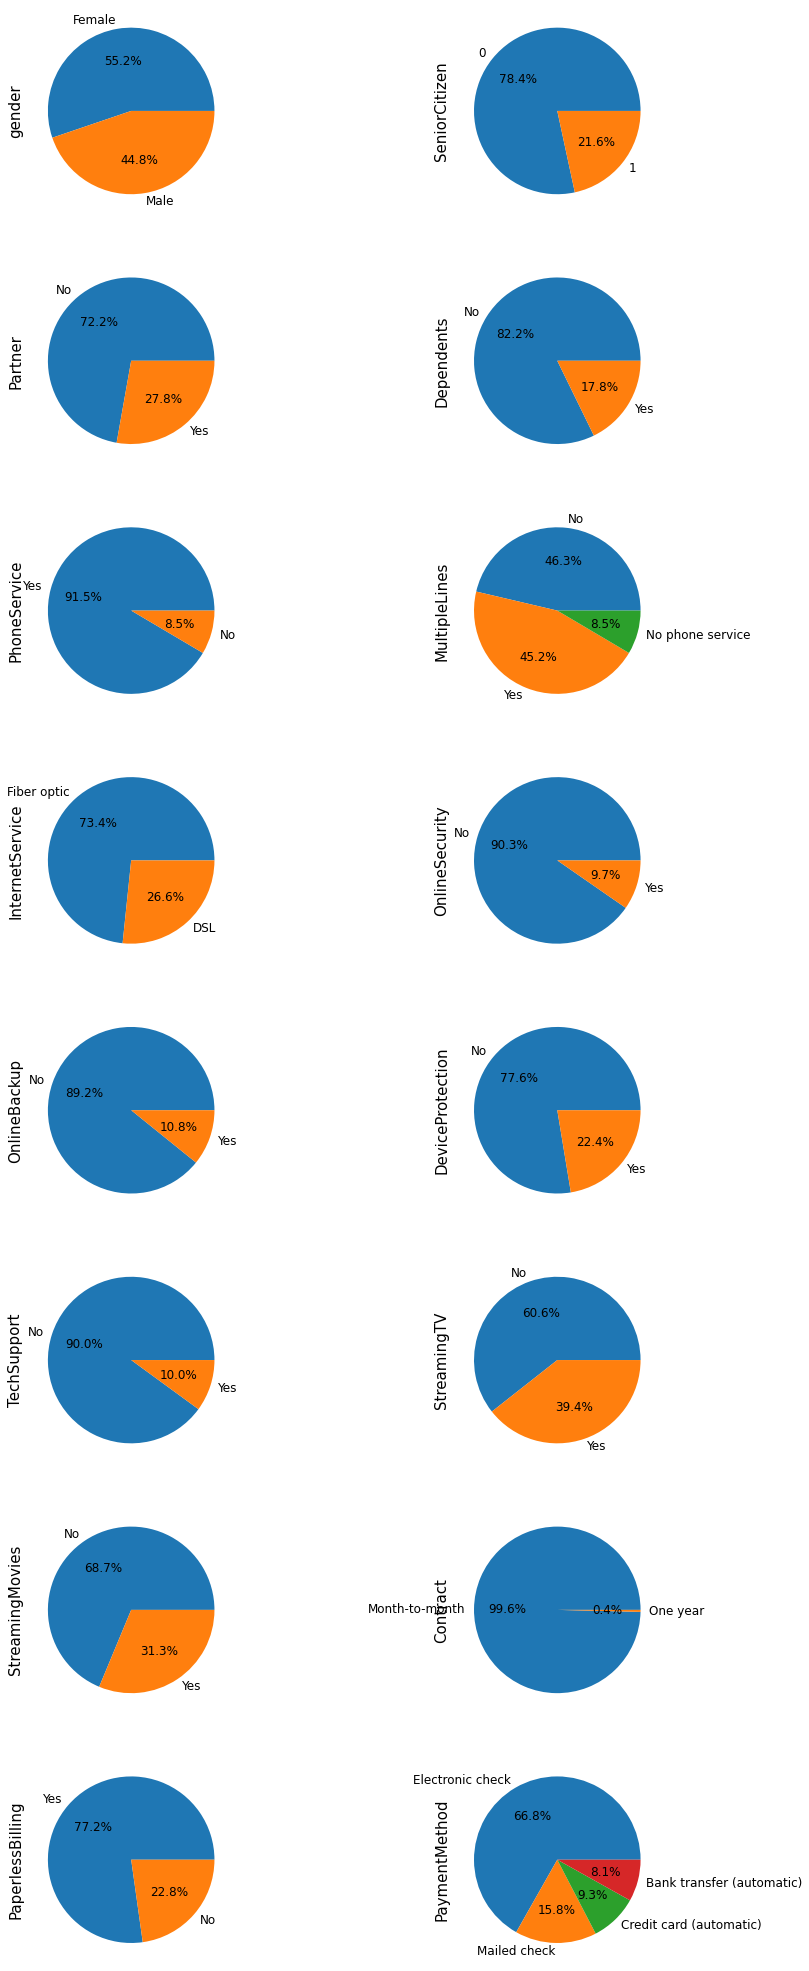

In [28]:
tmp = df_pred.loc[df_pred['Churn'] == 'Yes']
cat_eda(tmp, variables)

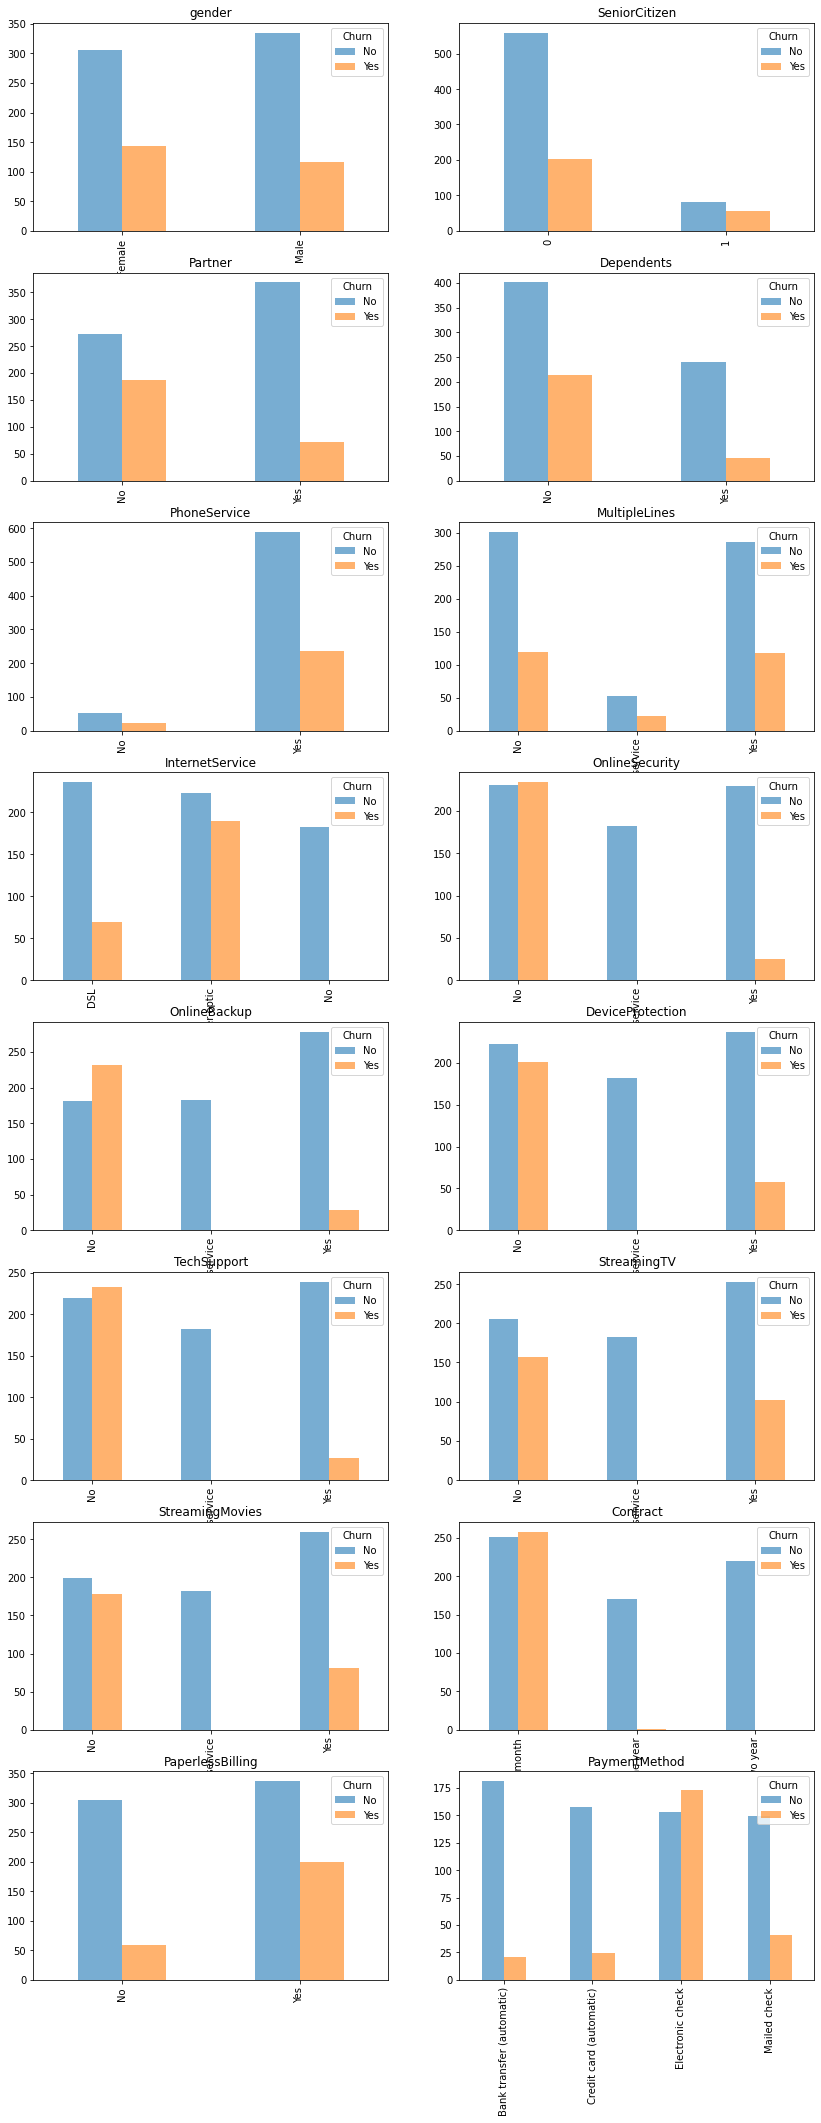

In [31]:
cat_targ(df_pred, variables[:-1])

In [33]:
tmp.MonthlyCharges.sum()

19058.0